# Odds Ratio
Odds Ratio is used for the test of independence when both variables are binary

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
df = pd.read_csv("CORIS.txt")

# encode famhist with dummy 0-1 variable
df['famhist'] = pd.get_dummies(df['famhist'])['Present']
df['famhist'] = df['famhist'].astype(int)
target = 'chd'
features = ['sbp', 'tobacco', 'ldl', 'famhist', 'obesity', 'alcohol', 'age']
features = ['famhist']

df.drop('row.names', axis=1, inplace=True)
df[features+[target]].head()

,famhist,chd
0,1,1
1,0,1
2,1,0
3,1,1
4,1,1


In [84]:
count_table = df.groupby(['famhist', 'chd']).size().unstack(fill_value=0)
count_table

chd,0,1
famhist,,
0,206,64
1,96,96


In [85]:
percentage_table = count_table.div(count_table.sum(axis=1), axis=0) * 100
percentage_table

chd,0,1
famhist,,
0,76.296296,23.703704
1,50.000000,50.000000


In [86]:
p = percentage_table.copy()
# MLE Estimate of Odds Ratio
odds_ratio = (p[0][0]*p[1][1])/(p[0][1]*p[1][0])
odds_ratio

3.2187499999999996

In [87]:
# MLE Estimate of Log Odds Ratio
log_oddsratio = np.log(odds_ratio)
log_oddsratio

1.168993085429909

If odds_ratio = 1; this implies that the events are independent. But also note that the odds_ratio is calculated from the sample data. So, what we calculated above is an estimate. There is a standard error to it.



In [90]:
x = count_table.copy()
odds_ratio = (x[0][0]*x[1][1])/(x[0][1]*x[1][0])

se_log_oddsratio = np.sqrt(1/x[0][0] + 1/x[0][1] + 1/x[1][0] + 1/x[1][1])
se_oddsratio = odds_ratio*se_log_oddsratio

# Determine the 95% confidence interval for ln(OR) using the normal distribution
## Sampling distribution of log_oddsratio == Central Limit theorem
z = stats.norm.ppf(0.975)  # 1.96 for 95% CI
CI_lower_ln_OR = log_oddsratio - z * se_log_oddsratio
CI_upper_ln_OR = log_oddsratio + z * se_log_oddsratio

# Exponentiate the CI to get the CI for OR
CI_lower_OR = np.exp(CI_lower_ln_OR)
CI_upper_OR = np.exp(CI_upper_ln_OR)


print(f"Odds Ratio (OR): {odds_ratio:.3f}")
print(f"95% Confidence Interval for LogOR: ({CI_lower_ln_OR:.3f}, {CI_upper_ln_OR:.3f})")

print(f"95% Confidence Interval for OR: ({CI_lower_OR:.3f}, {CI_upper_OR:.3f})")


Odds Ratio (OR): 3.219
95% Confidence Interval for LogOR: (0.771, 1.567)
95% Confidence Interval for OR: (2.161, 4.794)


If the data is from a randomised experiment, then odds_ratio != 1 can be interpreted as a causal relationship. But if the data is from an observational study, there can be confounding factors responsible. Hence odds_ratio != 1 only tells about independence/association/correlation.

Hence, given that odds_ratio>1 - famhist is associated with chd -- A good predictor.

# Programming proof that Log OddsRatio has CLT

In [76]:
# Step 1: Generate Random Data
n=0
vals = []
while n<10000:
    X = np.random.binomial(1, 0.5, 462)
    Y = np.random.binomial(1, 0.5, 462)
    
    x = pd.crosstab(X, Y)
    odds_ratio = (x[0][0]*x[1][1])/(x[0][1]*x[1][0])
    log_odds_ratio = np.log(odds_ratio)
    vals.append(log_odds_ratio)
    n=n+1

C:\Users\dskcy\AppData\Local\Temp\ipykernel_23064\2187983324.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vals, shade=True)
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


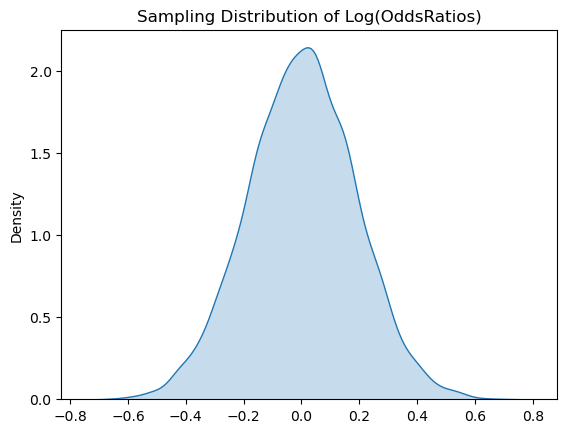

In [77]:
sns.kdeplot(vals, shade=True)
plt.title('Sampling Distribution of Log(OddsRatios)')
plt.show()

In [78]:
shapiro_test = stats.shapiro(vals)
# Shapiro-Wilk Test
if shapiro_test.pvalue > 0.05:
    print("Shapiro-Wilk Test: The data follows a normal distribution (fail to reject H0).")
else:
    print("Shapiro-Wilk Test: The data does not follow a normal distribution (reject H0).")


Shapiro-Wilk Test: The data follows a normal distribution (fail to reject H0).


C:\Users\dskcy\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [79]:
shapiro_test.pvalue

0.475604385137558

In [81]:
np.array(vals).std()

0.18690562647319675

In [89]:
se_log_oddsratio

0.20325526380729275